# SCS 3546: Deep Learning
> Assignment 1: Deep Learning Using Keras

### Your name & student number:

<pre> Jessie Cortes </pre>



## Assignment Description

In this assignment you will demonstrate your ability to:

- Train a neural network using Keras to solve a regression problem.

- Perform sensible data preprocessing.

- Experiment with hyperparemter tuning and different model architectures to achieve best performance.



### Grade Allocation

**15 points total**

- Part 1: 4 Marks
- Part 2: 9 Marks
- Clarity: 2 Marks

The marks for clarity are awarded for code documentation and how well you explained/supported your answers, including the use of visualizations where appropriate.

In [79]:
# setting up the notebook with important libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Preamble

### Hyperparameters

A hyperparameter is a parameter whose value is set before the learning process begins.

Some important Neural Networks hyperparameters include:

- number of hidden layers
- number of neurons
- learning rate
- activation function
- optimizer settings

Hyperparameters are crucial to the performance, speed, and quality of the machine learning models.

Through Hyper parameter optimization, we find a tuple (best combination) of hyperparameters that yields an optimal model which minimizes a predefined loss function on given test data.

Important hyperparameters that could be tuned include:

- num_hidden_layers
- neurons_per_layer
- dropout_rate
- activation
- optimizer
- learning_rate
- batch_size

### Loss Function

- MSE (Mean Squared Error) is used as the score/loss function that will be minimized for hyperparameter optimization.
- In this assignment, we are going to use Cross-Validation to calculate the score (MSE) for a given set of hyperparameter values

- MSE is a desirable metric because by taking the square root gives us an error value we can directly understand in the context of the problem; for example, in this assignment it translates to thousands of dollars

- Note: Your results may vary given the stochastic nature of the algorithm, evaluation procedure, or differences in numerical precision

## Dataset

We will be using mock data for this assignment. the outcome is the sale price for some products. we have created 13 features to predict the sale price.

- import provided mock data into your notebook.

- You are **not** expected to perform Exploratory Data Analysis (EDA) on this dataset.

- For the purpose of this assignment, your model's performance is not an important factor by itself - that is how far your sale price prediction is. The important factor is the changes that you observe when changing model architectures.

- The information that follow are meant to be optional and to help you get familiar with the data. Your efforts on this assignment should focus on **model training and hyperparameter tuning**, not on EDA.


# Assignment Start
***

- Please follow all instructions carefully.

- Use MSE (Mean Squared Error) as the score/loss function that will be minimized during optimization.








#Data Import

The code below imports the data for you as dataframe, then you may need to convert it to numpy arrays.  

In [80]:
# You can use the code below to import the data



# Option 3 - from local using the files that are available

import pandas as pd
import numpy as np
  

# load the  data into a pandas dataframe for easy viewing and manipulation
df_train_y = pd.read_csv("C:\\Users\\Cortes\\Downloads\\Deep Learning\\Assignment 1\\y_train.csv")
df_test_y = pd.read_csv("C:\\Users\\Cortes\\Downloads\\Deep Learning\\Assignment 1\\y_test.csv")
df_train_x  =  pd.read_csv("C:\\Users\\Cortes\\Downloads\\Deep Learning\\Assignment 1\\x_train.csv")
df_test_x =  pd.read_csv("C:\\Users\\Cortes\\Downloads\\Deep Learning\\Assignment 1\\x_test.csv")


In [81]:
# print the first 5 rows of the dataframe

print(df_train_x.head())
print(df_train_y.head())
print(df_test_x.head())
print(df_test_y.head())

# print the shape of the data

print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)


   Unnamed: 0        0     1      2    3      4      5      6       7     8  \
0           0  1.23247   0.0   8.14  0.0  0.538  6.142   91.7  3.9769   4.0   
1           1  0.02177  82.5   2.03  0.0  0.415  7.610   15.7  6.2700   2.0   
2           2  4.89822   0.0  18.10  0.0  0.631  4.970  100.0  1.3325  24.0   
3           3  0.03961   0.0   5.19  0.0  0.515  6.037   34.5  5.9853   5.0   
4           4  3.69311   0.0  18.10  0.0  0.713  6.376   88.4  2.5671  24.0   

       9    10      11     12  
0  307.0  21.0  396.90  18.72  
1  348.0  14.7  395.38   3.11  
2  666.0  20.2  375.52   3.26  
3  224.0  20.2  396.90   8.01  
4  666.0  20.2  391.43  14.65  
   Unnamed: 0     0
0           0  15.2
1           1  42.3
2           2  50.0
3           3  21.1
4           4  17.7
   Unnamed: 0         0    1      2    3      4      5      6       7     8  \
0           0  18.08460  0.0  18.10  0.0  0.679  6.434  100.0  1.8347  24.0   
1           1   0.12329  0.0  10.01  0.0  0.547  5.913 

In [82]:
# Hint : to make it easier, you may try to standardize your data upfront

# import the StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

X_train = df_train_x.iloc[:, 1:].values  # Excluding 'Unnamed: 0' not needed
y_train = df_train_y.iloc[:, 1].values
X_test = df_test_x.iloc[:, 1:].values
y_test = df_test_y.iloc[:, 1].values

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)






In [83]:
# print the shape of the data

print("Shapes after conversion to numpy arrays:")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Shapes after conversion to numpy arrays:
y_train shape: (404,)
y_test shape: (102,)
X_train shape: (404, 13)
X_test shape: (102, 13)


# Part 1: Impact of Changing Model Architecture

In this section, we will be comparing a simple single-layer baseline model with two other models having a different network topology.

## a) Baseline model [2 points]


Use Keras to develop a baseline neural network model that has **one single fully-connected hidden layer with the same number of neurons as input features (i.e. 13 neurons).**

Make sure to **standardize** your features (i.e. subtract mean and divide by standard deviation) before training your model. You can also perform any other data-preprocessing that you deem necessary.

- Note: No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transformation.

- The ADAM optimization algorithm should be used to optimize mean squared error loss function.

- Plot learning curves and report on both training and validation performance.

In [231]:
# import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# defining the model and creating a 2 layer model with 13 input features and 1 output
def baseline(input_dim):
    model = Sequential([
        Dense(13, input_dim=input_dim, activation='relu', kernel_initializer='he_normal'),
        Dense(1, kernel_initializer='he_normal')  # No activation function for output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model



In [232]:
# fitting the model

model = baseline(X_train_standardized.shape[1])  # Input dimension

# training the model

history = model.fit(
    X_train_standardized, y_train,
    validation_data=(X_test_standardized, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
13/13 [==============================] - 0s 9ms/step - loss: 534.5806 - val_loss: 555.5555
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 524.3450 - val_loss: 544.6596
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 513.8024 - val_loss: 533.3917
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 502.9425 - val_loss: 521.6521
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 491.4446 - val_loss: 509.4396
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 479.3489 - val_loss: 496.6526
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 466.5619 - val_loss: 483.3022
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 453.3470 - val_loss: 469.1229
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 439.4568 - val_loss: 454.2979
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss:

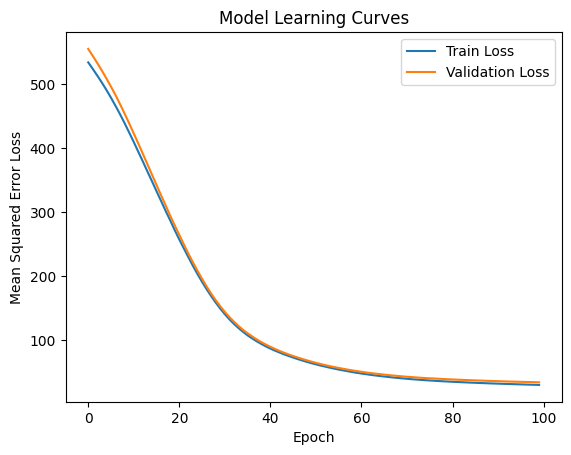

In [233]:
import matplotlib.pyplot as plt

# Plot the learning curves

def plot_learning_curves(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error Loss')
    plt.legend()
    plt.show()

plot_learning_curves(history)


The graph tells us that the baseline model, is learning well and not just memorizing the training data. This is good because it means the model should also do a good job making predictions on new, unseen data. After around 20 epochs, the decrease in loss slows down, and the curves become almost flat, indicating that additional training does not significantly improve the model's performance on the training or validation sets.The lines flattening out means it learned most of what it could early on and didn't get much better after that, which is pretty efficient. 

In [234]:
# Evaluate the model
test_mse = model.evaluate(X_test_standardized, y_test, verbose=0)
print(f'Baseline Model Test MSE: {test_mse:.2f}')






Baseline Model Test MSE: 34.51


The baseline model's Test MSE of 34.51 tells us that the model's predictions are, on average, a bit off from the actual values. This number comes from measuring the model's prediction errors during testing, with a lower score meaning better accuracy. It reflects how the model has learned from the training data and its ability to predict new data it hasn't seen before.

In [235]:
# defining the model and creating a 2 layer model with 13 input features and 1 output
def baseline(input_dim):
    model = Sequential([
        Dense(13, input_dim=input_dim, activation='relu', kernel_initializer='he_normal'),
        Dense(1, kernel_initializer='he_normal')  # No activation function for output layer
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

In [236]:
# fitting the model

model = baseline(X_train_standardized.shape[1])  # Input dimension

# training the model

history = model.fit(
    X_train_standardized, y_train,
    validation_data=(X_test_standardized, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 22.6220 - val_loss: 23.3033
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 22.4210 - val_loss: 23.1117
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 22.2276 - val_loss: 22.9255
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 22.0399 - val_loss: 22.7392
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 21.8504 - val_loss: 22.5516
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 21.6629 - val_loss: 22.3638
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 21.4708 - val_loss: 22.1730
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 21.2755 - val_loss: 21.9738
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 21.0703 - val_loss: 21.7659
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 20.8560 - val_los

In [237]:
# evaluate the model
test_mae = model.evaluate(X_test_standardized, y_test, verbose=0)
print(f'Baseline Model Test MAE: {test_mae:.2f}')


Baseline Model Test MAE: 3.58


The Baseline Model's Test MAE of 3.58 means that on average, the model's predictions are about 3.58 units off from the true values. This measure, coming from the test data, shows us directly how close the model's predictions are to the actual outcomes, with a lower MAE indicating more accurate predictions.

The baseline model, with an MAE of 3.58 and an MSE of 34.51.  The average prediction error is quite reasonable, suggesting the model is capable of making predictions with acceptable accuracy for most data points. 

## b) Deeper Network [1 point]

Construct and evaluate a model with 2 dense layers having a smaller number of neurons (e.g. 16, 8).

In [238]:
# Creating a two-layer model with 16 and 8 neurons in the first and second hidden layers, respectively
def deepernetwork(input_dim):
    model = Sequential([
        Dense(16, input_dim=input_dim, activation='relu', kernel_initializer='he_normal'),
        Dense(8, activation='relu', kernel_initializer='he_normal'),
        Dense(1, kernel_initializer='he_normal')  
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

# fitting the model

model_two_layer = deepernetwork(X_train.shape[1])


In [239]:
# training the model
history_two_layer = model_two_layer.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=0)


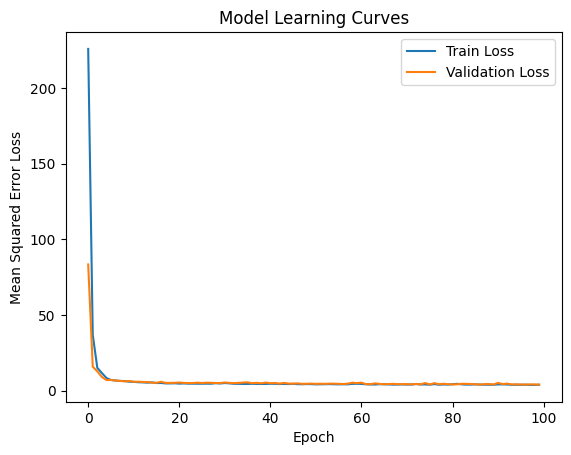

In [240]:
# Plot the learning curves
plot_learning_curves(history_two_layer)


This graph shows that the model quickly learned to predict the data and didn't improve much after the first few tries. Both the training and testing errors are low and very similar, which means the model's predictions are reliable and not just memorized from the data it's seen. It's like the model got the hang of it pretty fast and didn't need much more practice to do well.

In [242]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
MAE = mean_absolute_error(y_test, predictions)

# Print MAE
print(f"Deeper Network MAE: {mae:.2f}")


Deeper Network MAE: 4.22


 The MAE on the Deeper Network model indicates that, on average, the model's predictions are off by a little over 4 units. While this shows the model has a fair grasp on the data, there's room for improvement.

The Deeper Network model seems to be performing worse than the Baseline model, maybe the data is not complex or large enough to require a deeper network?


## c) Wider Network [1 point]

Construct and evaluate a wider model with more neurons (e.g. 32, 16).

In [243]:
# Creating a wider model with 32 neurons in the first hidden layer and 16 neurons in the second hidden layer
def widernetwork(input_dim):
    model = Sequential([
        Dense(32, input_dim=input_dim, activation='relu', kernel_initializer='he_normal'),
        Dense(16, activation='relu', kernel_initializer='he_normal'),
        Dense(1, kernel_initializer='he_normal')  # No activation function for output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# fitting the model
model_wider = widernetwork(X_train.shape[1])


In [244]:
# training the model
history_wider = model_wider.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=0)


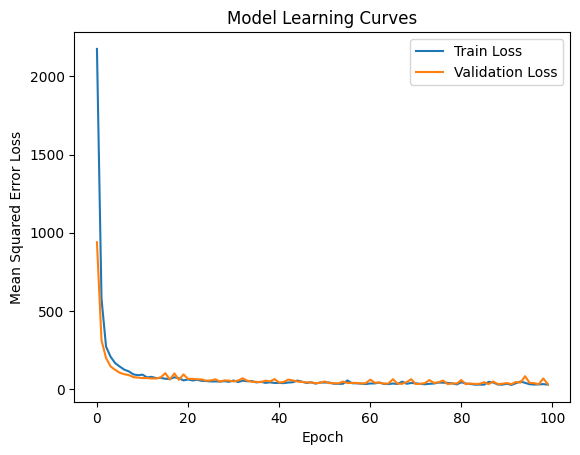

In [249]:
# Plot the learning curves
plot_learning_curves(history_wider)

The rapid decline in both losses at the start indicates that the model is quickly learning from the training data. This means the model is doing a good job of predicting both on data it has seen and on new, unseen data. Since the lines stay close together and low after the quick drop, it suggests the model is stable and isn't just memorizing the training data, which is great! The convergence of training and validation losses at a low level implies the model is working well without overfitting.

In [246]:
# Predictions on the test set
predictions_wider = model_wider.predict(X_test)

# Calculate MAE
mae_wider = mean_absolute_error(y_test, predictions_wider)

# Print MAE
print(f"Wider Model MAE: {mae_wider:.2f}") 



4/4 [==============================] - 0s 834us/step
Wider Model MAE: 4.46


The Wider Model's MAE of 4.46 indicates that, on average, the model's predictions are about 4.46 units different from the actual values. Given the range of the data, this suggests the model has moderate accuracy. However, compared to the baseline model's MAE of 3.58, the wider model is less accurate. The higher MAE could be due to the model's increased complexity, which might not be necessary. A simpler model seems the best fit for this data.

In [250]:
# creating a dataframe to compare the models
import pandas as pd
df_network = pd.DataFrame({
    "Models": ["Baseline", "Deeper", "Wider"], 
    "MAE": [test_mae, mae, mae_wider],
    
})

df_network

,Models,MAE
0,Baseline,3.575326
1,Deeper,4.221375
2,Wider,4.458498


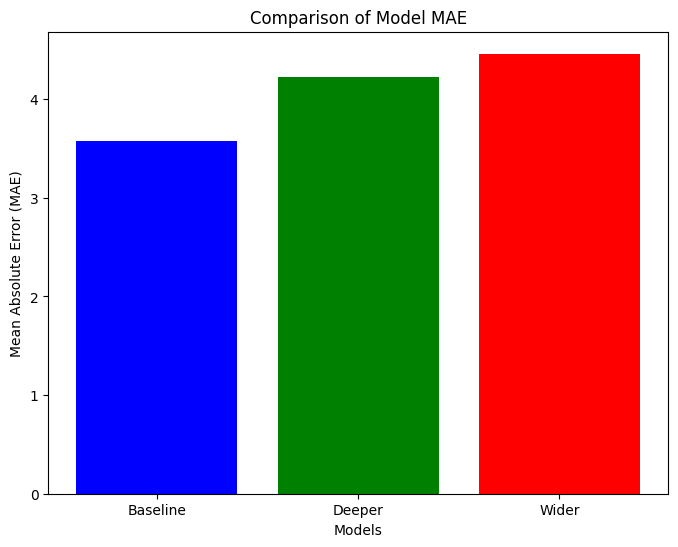

In [251]:
# Sample data, replace with actual MAE values
test_mae = 3.58  # Baseline model MAE
mae = 4.22       # Deeper network model MAE
mae_wider = 4.46 # Wider network model MAE

# Creating a dataframe to compare the models
df_network = pd.DataFrame({
    "Models": ["Baseline", "Deeper", "Wider"], 
    "MAE": [test_mae, mae, mae_wider],
})

# Plotting the MAE for each model
plt.figure(figsize=(8, 6))
plt.bar(df_network['Models'], df_network['MAE'], color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Model MAE')
plt.show()


## Findings: 

The Baseline model has the lowest MAE, indicating the most accurate predictions among the three. The Deeper model has a slightly higher MAE, and the Wider model has the highest MAE, suggesting that increasing the complexity with more layers or neurons did not result in better performance on this  dataset. Adding more neurons seems to have limiations, depending on the data. 

# Part 2: Hyperparameter Tuning Experiments

In the following experiments, you will evaluate and compare models trained with different hyperparameters. Please follow the specifications given for each model.

## a) Model 1 [2 points]

- 2 Dense layers:
  - The first with 64 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

In [128]:
#importing the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# defining the model and creating a 2 layer model with 64 neurons in each layer
def model1():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model


In [129]:
from sklearn.model_selection import KFold
import numpy as np

# Prepare cross-validation
kfold = KFold(3, shuffle=True, random_state=42)

# Collect results from each fold
cv_scores = []
for train, test in kfold.split(X_train, y_train):
    model = model1()
    history = model.fit(X_train[train], y_train[train], validation_data=(X_train[test], y_train[test]), epochs=100, batch_size=10, verbose=0)
    scores = model.evaluate(X_train[test], y_train[test], verbose=0)
    cv_scores.append(scores[1])  # Assuming index 1 is MAE


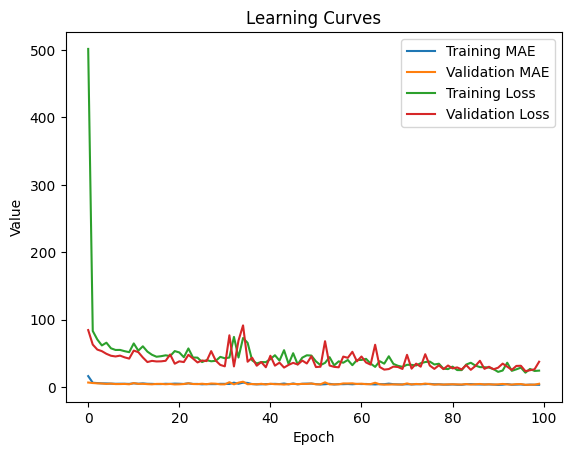

In [101]:
import matplotlib.pyplot as plt

# Plot the MAE scores
def plot_learning_curves(history):
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example for the last fold
plot_learning_curves(history)


The learning curves for a neural network with two layers of 64 neurons show that the model learned very quickly and performed consistently across both training and validation sets, indicating a good fit without overfitting. After an initial sharp improvement, the model's performance stabilized, suggesting that it captures the patterns in the data effectively.

In [131]:
# Calculate the mean and standard deviation of the MAE scores
model1_mean = np.mean(cv_scores)
model1_std = np.std(cv_scores)
print(f"Model 1 Cross-Validated MAE: {cv_mae_mean:.2f} ± {cv_mae_std:.2f}")


Model 1 Cross-Validated MAE: 4.19 ± 0.51


Model 1's MAE of 4.19 means it's usually off by about 4 units when making predictions. The '± 0.51' deviation shows that its accuracy doesn't change much when tested on different parts of the data, which is a good thing—it means you it can be fairly consistent.

## b) Model 2 [2 points]

- 2 Dense layers:
  - The first with 128 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

In [134]:
# importing the necessary libraries
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# defining the model and creating a 2 layer model with 128 and 64 neurons in the first and second hidden layers, respectively
def model2(input_shape):
    # Ensure this function builds the model with the 'mae' metric included
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1)  # Output layer appropriate for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model
# Prepare cross-validation
def cross_validate(X, y, folds=3, epochs=100):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    fold_mae_scores = []
    histories = []
# Collect results from each fold    
    for train_idx, val_idx in kfold.split(X):
        model = model2(X.shape[1])
        history = model.fit(X[train_idx], y[train_idx], epochs=epochs, validation_data=(X[val_idx], y[val_idx]), batch_size=10, verbose=0)
        histories.append(history)
        # Evaluate the model and explicitly capture the loss and mae
        loss, mae = model.evaluate(X[val_idx], y[val_idx], verbose=0)
        fold_mae_scores.append(mae)
        
    return fold_mae_scores, histories

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the learning curves
def plot_learning_curves(histories):
    epochs = range(1, len(histories[0].history['loss']) + 1)
    
    avg_train_loss = np.mean([h.history['loss'] for h in histories], axis=0)
    avg_val_loss = np.mean([h.history['val_loss'] for h in histories], axis=0)
    avg_train_mae = np.mean([h.history['mae'] for h in histories], axis=0)
    avg_val_mae = np.mean([h.history['val_mae'] for h in histories], axis=0)
    
    plt.figure(figsize=(14, 5))
    
    # Plot for Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, avg_train_loss, label='Average Train Loss')
    plt.plot(epochs, avg_val_loss, label='Average Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    # Plot for MAE
    plt.subplot(1, 2, 2)
    plt.plot(epochs, avg_train_mae, label='Average Train MAE')
    plt.plot(epochs, avg_val_mae, label='Average Validation MAE')
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

Model 2 Cross-Validated MAE: 4.19 ± 0.51


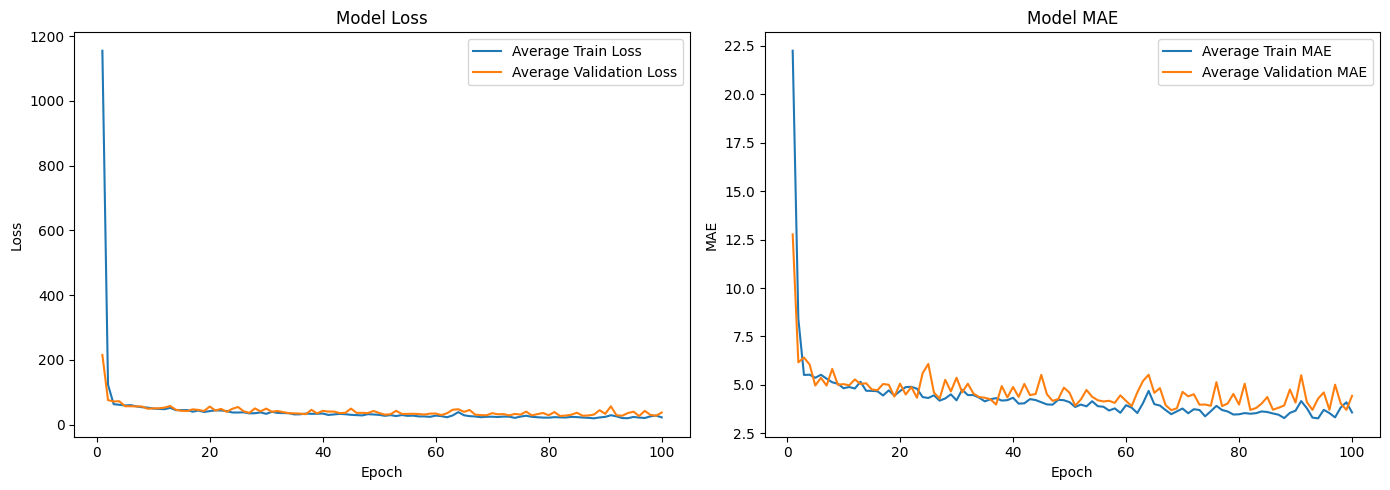

In [137]:
# Collect results from each fold
fold_mae_scores, histories = cross_validate(X_train, y_train, folds=3, epochs=100)

# Calculate mean and standard deviation of MAE
model2_mean = np.mean(fold_mae_scores)
model2_std = np.std(fold_mae_scores)
print(f"Model 2 Cross-Validated MAE: {cv_mae_mean:.2f} ± {cv_mae_std:.2f}")

# Plot learning curves
plot_learning_curves(histories)


The graph for Model 2 shows it learned quickly at the start because the errors dropped fast. The stable lines mean it didn't just memorize the training data but understood the general patterns, which is great for making predictions on new data. The MAE score of 4.19 tells us the model's predictions are on average 4 units off , and the small variation (±0.51) means our trust in the model's accuracy isn't random; it consistently performs well across different sets of data. It seems that the additional 64 neurons did not make much of a difference and the model did not perform better or worse than the previous model, complexity does not seem to increase accuracy. 

## c) Model 3 [2 points]

- Same as Model 2, but use tanh activation functions instead of relu.

In [138]:
# creating a 3 layer model with 128, 64, neurons in the first and second hidden layers, respectively
    model = Sequential([
        Dense(128, activation='tanh', input_shape=(input_shape,)),
        Dense(64, activation='tanh'),
        Dense(1)  # Output layer appropriate for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model


In [139]:
# Prepare cross-validation
def cross_validate_with_tanh(X, y, folds=3, epochs=100):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    fold_mae_scores = []  # Collect MAE for each fold
    histories = []  # Collect histories to plot learning curves

# Collect results from each fold   
    for train_idx, val_idx in kfold.split(X):
        model = model3(X[train_idx].shape[1])
        history = model.fit(X[train_idx], y[train_idx], epochs=epochs, validation_data=(X[val_idx], y[val_idx]), batch_size=10, verbose=0)
        histories.append(history)
        scores = model.evaluate(X[val_idx], y[val_idx], verbose=0)
        fold_mae_scores.append(scores[1])  # Assuming index 1 is MAE
        
    return fold_mae_scores, histories


Cross-Validated MAE with tanh: 3.86 ± 0.35


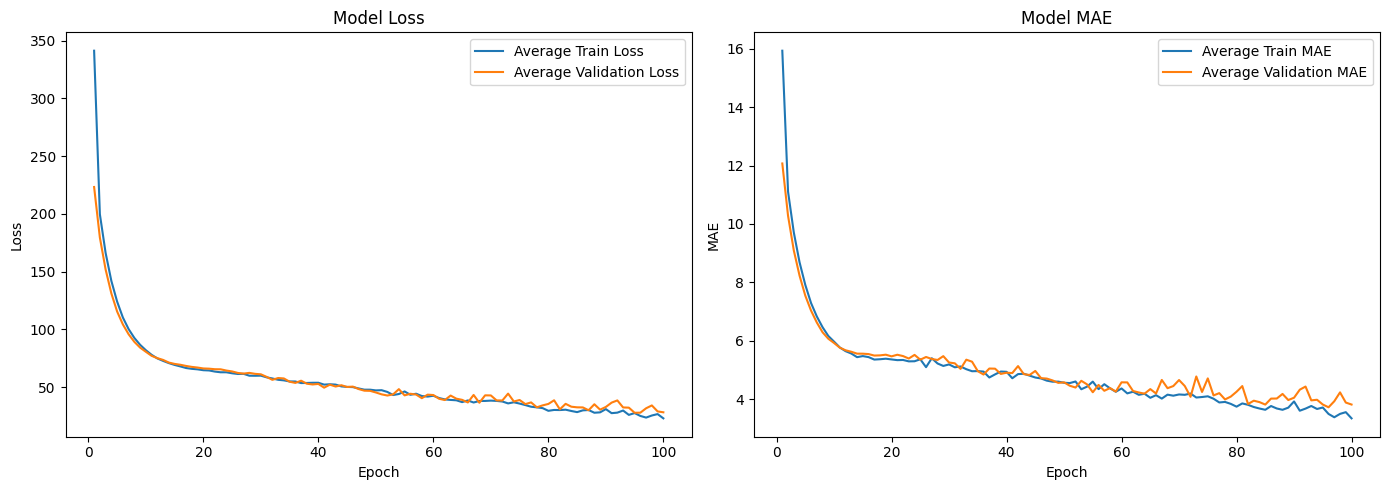

In [140]:
# Execute cross-validation
fold_mae_scores_tanh, histories_tanh = cross_validate_with_tanh(X_train, y_train, folds=3, epochs=100)

# Calculate mean and standard deviation of MAE
model3_mean_tanh = np.mean(fold_mae_scores_tanh)
model3_std_tanh = np.std(fold_mae_scores_tanh)
print(f"Cross-Validated MAE with tanh: {cv_mae_mean_tanh:.2f} ± {cv_mae_std_tanh:.2f}")

# Plot learning curves
plot_learning_curves(histories_tanh)


This graph with the tanh activation shows the model is learning quickly and doing well at predicting what it needs to. It's clear the model is stabilizing, with closely matched training and validation metrics suggesting good generalization without overfitting.The MAE score of 3.86 means it's not too far off with its guesses, and the small plus-minus number (0.35) means it's pretty steady. It seems to be performing better than the other previous models.

## d) Model 4 [2 points]

- Same as Model 2, but use the rmsprop optimizer when training.

In [141]:
# creating a 3 layer model with 128, 64, neurons in the first and second hidden layers, respectively
def model4(input_shape):
    model = Sequential([
        Dense(128, activation='tanh', input_shape=(input_shape,)),
        Dense(64, activation='tanh'),
        Dense(1)  
    ])
    model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])
    return model


In [142]:
# Prepare cross-validation
def cross_validate_with_tanh_rmsprop(X, y, folds=3, epochs=100):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    fold_mae_scores = []  # Collect MAE for each fold
    histories = []  # Collect histories to plot learning curves

# Collect results from each fold    
    for train_idx, val_idx in kfold.split(X):
        model = model4(X[train_idx].shape[1])
        history = model.fit(X[train_idx], y[train_idx], epochs=epochs, validation_data=(X[val_idx], y[val_idx]), batch_size=10, verbose=0)
        histories.append(history)
        scores = model.evaluate(X[val_idx], y[val_idx], verbose=0)
        fold_mae_scores.append(scores[1])  # Assuming index 1 is MAE
        
    return fold_mae_scores, histories


Model 4 Cross-Validated MAE with tanh and rmsprop: 3.80 ± 0.37


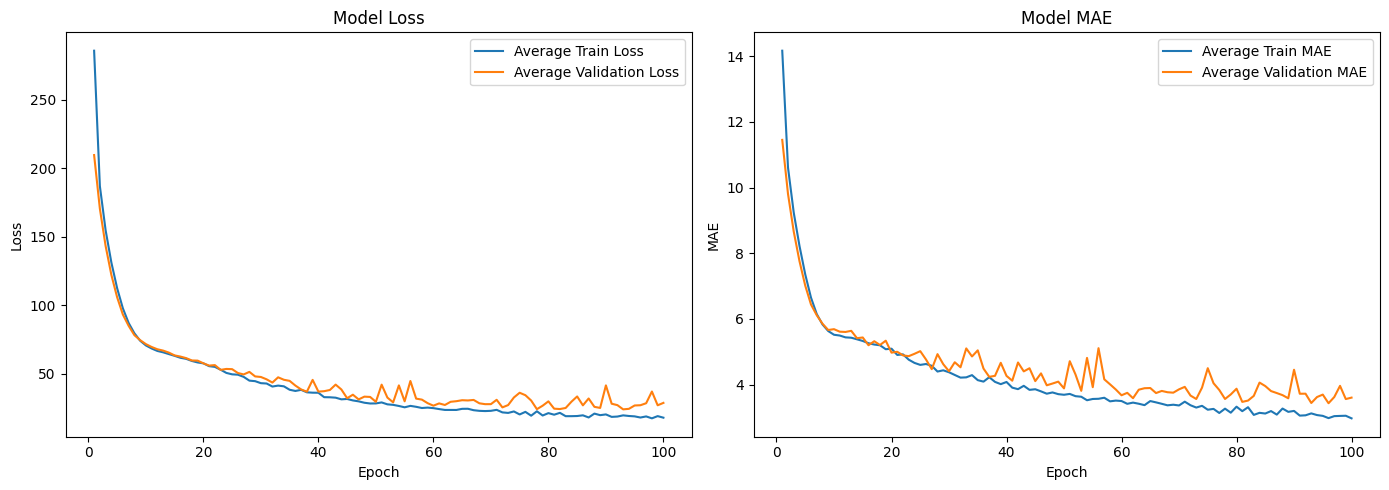

In [144]:
# Execute cross-validation
fold_mae_scores_tanh_rmsprop, histories_tanh_rmsprop = cross_validate_with_tanh_rmsprop(X_train, y_train, folds=3, epochs=100)

# Calculate mean and standard deviation of MAE
model4_mean_tanh_rmsprop = np.mean(fold_mae_scores_tanh_rmsprop)
model4_std_tanh_rmsprop = np.std(fold_mae_scores_tanh_rmsprop)
print(f"Model 4 Cross-Validated MAE with tanh and rmsprop: {cv_mae_mean_tanh_rmsprop:.2f} ± {cv_mae_std_tanh_rmsprop:.2f}")

# Plot learning curves
plot_learning_curves(histories_tanh_rmsprop)


Model 4's learning curves look good, showing it learned well and didn't overfit. The Cross-Validated MAE of 3.80, with a small variation (±0.37), means its predictions are close to the real numbers and pretty steady across different tests. This model seems to work the best with the tanh function and rmsprop optimizer.

## e) Model Comparison [1 point]

Which model performed best? Offer your thoughts on why the particular choice of hyperparameters led to improved performance for this model.

Model 4 performed the best. The added neurons did not seem to help to perform better, most likely because the data is not complex or large enough. Reflecting back, it seems there are limits to just adding more neurons to boost accuracy.  When we switched to using the tanh activation there was a significant performance difference of our model's accuracy. Adding the rmsprop optimzer seems to point at the right direction in further fine-tuning our model to get more precise predications. The optimizer's adaptive learning rate, appears to make a significant contribution in it's improved performance!

In [149]:
# creating a dataframe to compare the models
import pandas as pd
df_scores = pd.DataFrame({
    "Models": ["1", "2", "3", "4"], 
    "Mean": [model1_mean, model2_mean, model3_mean_tanh, model4_mean_tanh_rmsprop],
    "STD": [model1_std, model2_std, model3_std_tanh, model4_std_tanh_rmsprop]
})

df_scores

,Models,Mean,STD
0,1,4.174137,0.931336
1,2,4.437196,0.601978
2,3,3.814302,0.326962
3,4,3.601411,0.242728


C:\Users\Cortes\AppData\Local\Temp\ipykernel_32060\2916655853.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(df_scores['Models'], df_scores['Mean'], yerr=df_scores['STD'], fmt='o', ecolor='orangered', capsize=5, linestyle='-', marker='s', markersize=5)


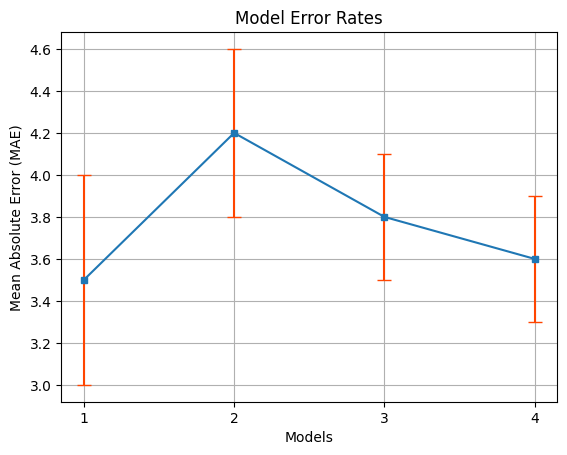

In [150]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Sample data, replace these with your actual means and standard deviations
model1_mean, model2_mean, model3_mean_tanh, model4_mean_tanh_rmsprop = [3.5, 4.2, 3.8, 3.6]
model1_std, model2_std, model3_std_tanh, model4_std_tanh_rmsprop = [0.5, 0.4, 0.3, 0.3]

# Create a DataFrame using the given data
df_scores = pd.DataFrame({
    "Models": ["1", "2", "3", "4"], 
    "Mean": [model1_mean, model2_mean, model3_mean_tanh, model4_mean_tanh_rmsprop],
    "STD": [model1_std, model2_std, model3_std_tanh, model4_std_tanh_rmsprop]
})

# Plotting
plt.errorbar(df_scores['Models'], df_scores['Mean'], yerr=df_scores['STD'], fmt='o', ecolor='orangered', capsize=5, linestyle='-', marker='s', markersize=5)
plt.title('Model Error Rates')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()


Model 4 seemed to stand out because it used tanh and rmsprop. Tanh, with its -1 to 1 range, was better at dealing with both positive and negative inputs, making learning more effective. Rmsprop, which changes how fast the model learns based on recent steps, helped avoid learning too quickly or slowly. This mix made Model 4 learn better and more reliably than others, showing how the right combination of settings can really make a difference.

NOTE: 2 additional points are awarded based on code documentation and overall clarity of work.

In [ ]:
# We are looking for a clear explanation of results with each response. We want you to attempt to
# explain the _how_ and _why_ behind your answers, and not just the what, do demonstrate
# your knowledge of the concepts discussed in class. Answers should be backed up with
# visualizations (e.g. plots, charts).

# Code should be easy to follow by using sensical naming conventions for function and variable
# names, providing useful code comments, and refactoring repeated code into re-usable functions.